In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score,accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score,roc_curve,roc_auc_score
from graphviz import Source
from sklearn.feature_extraction import DictVectorizer
from IPython.display import Image
import pydotplus

In [2]:
names = ['preg', 'glucose', 'bloodPres', 'skinThick','insulin','BMI','pedig','age','class'] 
data = pd.read_csv('diabetes_data.csv', header=0, names = names) # header=0 取第0行开始的数据，names覆盖原names
data.head()

,preg,glucose,bloodPres,skinThick,insulin,BMI,pedig,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [4]:
data.dtypes

preg           int64
glucose        int64
bloodPres      int64
skinThick      int64
insulin        int64
BMI          float64
pedig        float64
age            int64
class          int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   preg       768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   bloodPres  768 non-null    int64  
 3   skinThick  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedig      768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


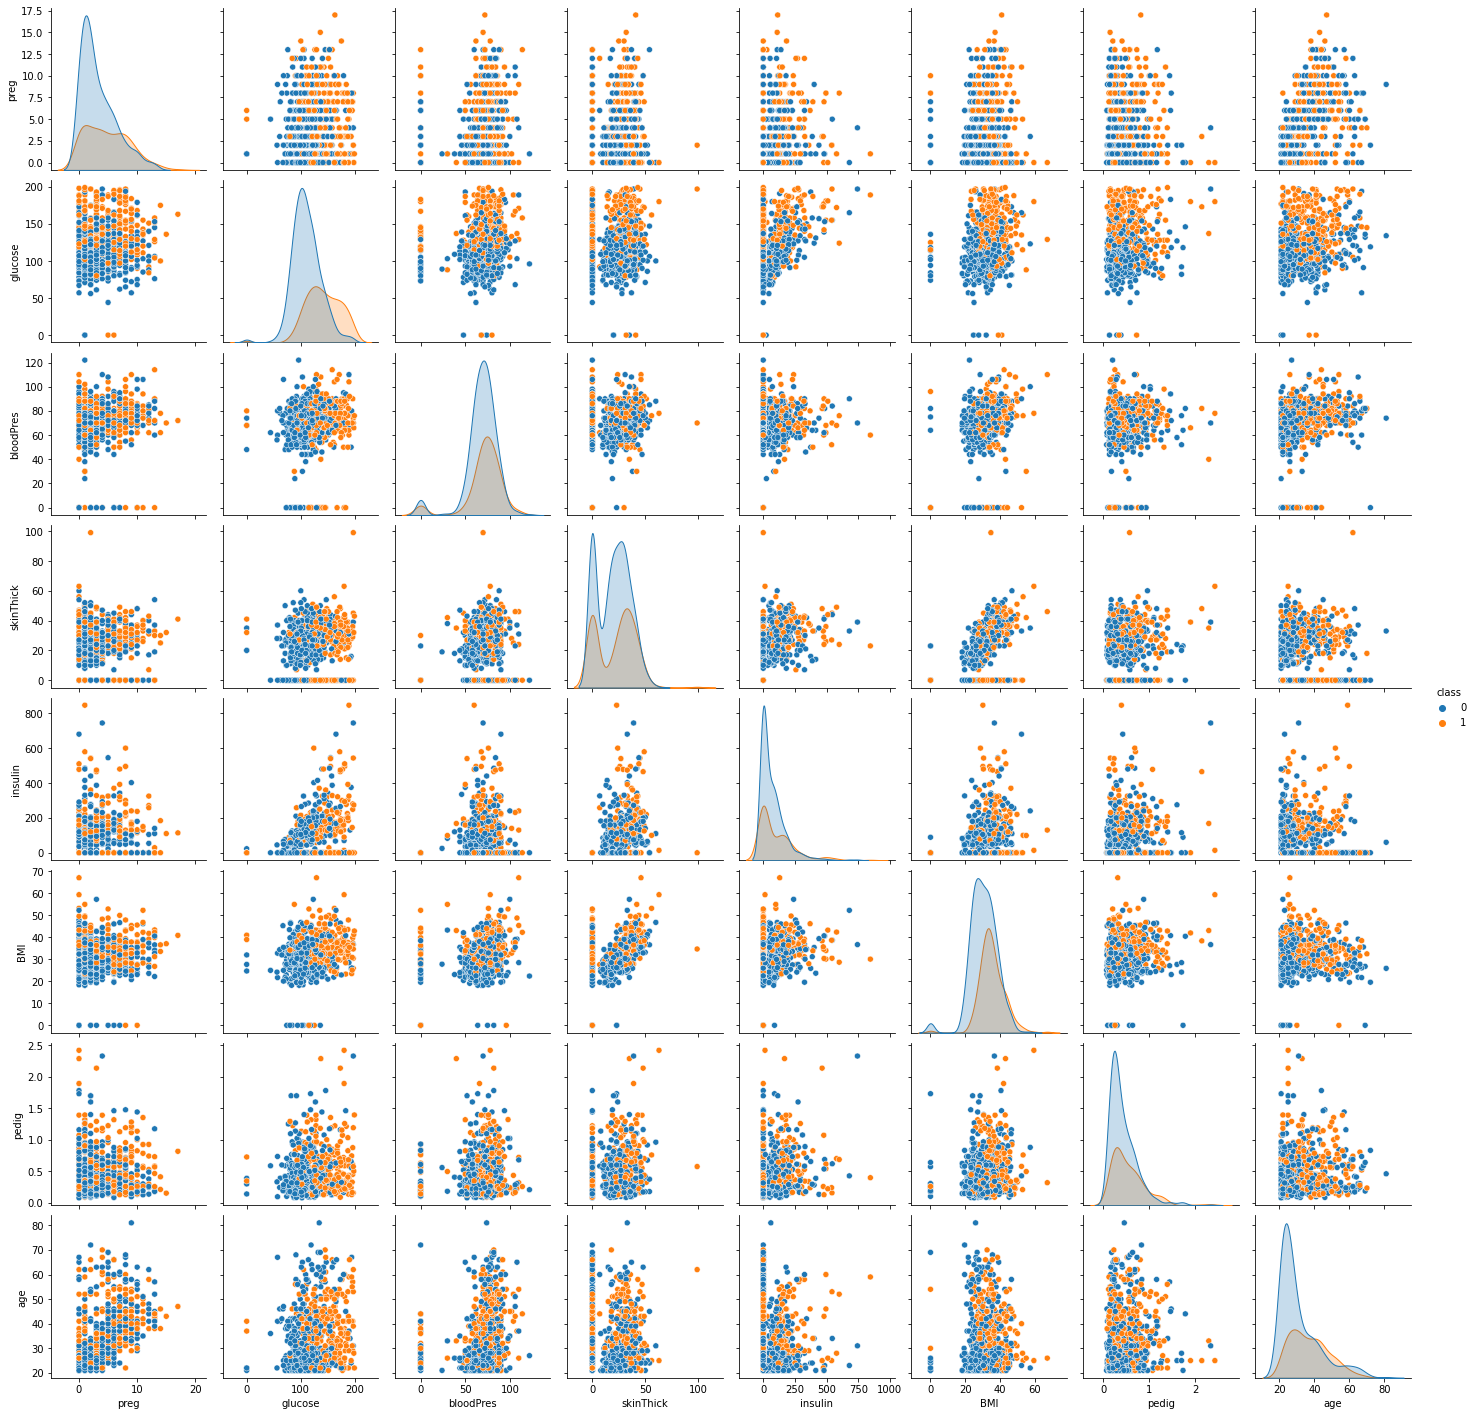

In [6]:
# 数据可视化
sns.pairplot(data, hue='class')

<AxesSubplot:>

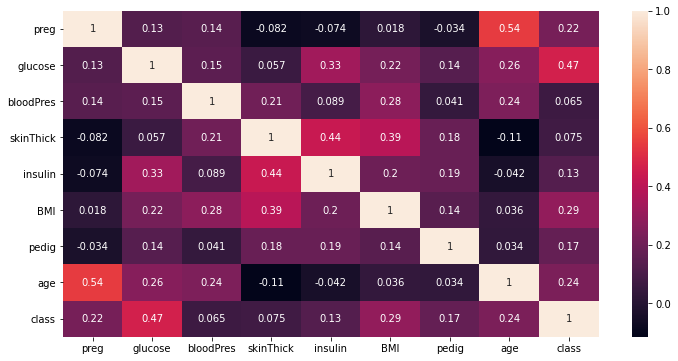

In [7]:
# 特征相关性分析
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot = True)

In [8]:
# 数据集
X = data[['preg', 'glucose', 'bloodPres', 'skinThick','insulin','BMI','pedig','age']].values
y = data['class'].values

# 训练集，测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)  # 30%检测 # 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [9]:
# 使用信息熵作为划分标准，对决策树进行训练 
id3 = tree.DecisionTreeClassifier(criterion='entropy')   
id3.fit(x_train,y_train)  
# 使用gini系数为划分标准
cart = tree.DecisionTreeClassifier()
cart.fit(x_train, y_train)


DecisionTreeClassifier()

In [10]:
#系数反映每个特征的影响力。越大表示该特征在分类中起到的作用越大
print(id3.feature_importances_)
# result: 0.11406267 0.31769867 0.05707966 0.06008194 0.06118418 0.18023201 0.10848189 0.10117897
print(cart.feature_importances_)
# result: 0.05704088 0.36878483 0.06242917 0.03643442 0.05809623 0.16550571 0.1275101  0.12419866

[0.0721977  0.33785263 0.05628734 0.05878386 0.05951375 0.1899708
 0.10081713 0.1245768 ]
[0.06734726 0.36470405 0.08785545 0.0475718  0.07913514 0.16667353
 0.06230766 0.12440511]


In [11]:
# 预测
predict1 = id3.predict(x_test)
predict2 = cart.predict(x_test)
# print(predict1)
# print(predict2)

In [12]:

print(classification_report(y_test, predict1, target_names = ['1','0']))

print(classification_report(y_test, predict2, target_names = ['1','0']))

              precision    recall  f1-score   support

           1       0.76      0.73      0.75       155
           0       0.49      0.54      0.52        76

    accuracy                           0.67       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.67      0.67      0.67       231

              precision    recall  f1-score   support

           1       0.82      0.77      0.79       155
           0       0.58      0.64      0.61        76

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.73      0.73       231



In [13]:
# 效果

print('MSE is: ',mean_squared_error(y_test, predict1)) # 0.3333333333333333
print('R2 is: ', r2_score(y_test, predict1)) # -0.553721174004193
print('MSE is: ',mean_squared_error(y_test, predict2)) # 0.3333333333333333
print('R2 is: ', r2_score(y_test, predict2)) # -0.553721174004193

MSE is:  0.3333333333333333
R2 is:  -0.5099320882852296
MSE is:  0.2727272727272727
R2 is:  -0.23539898132427872


Text(0.5, 1.0, 'Cart prediction')

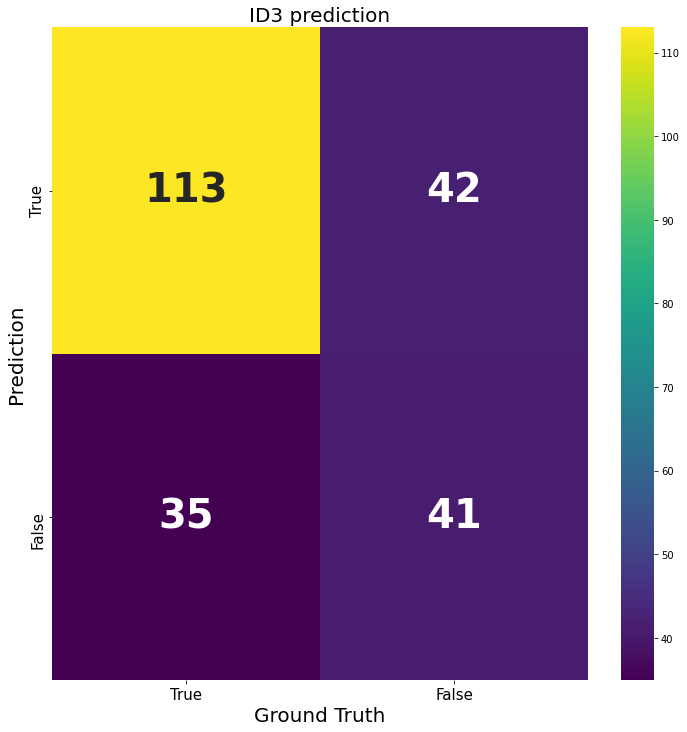

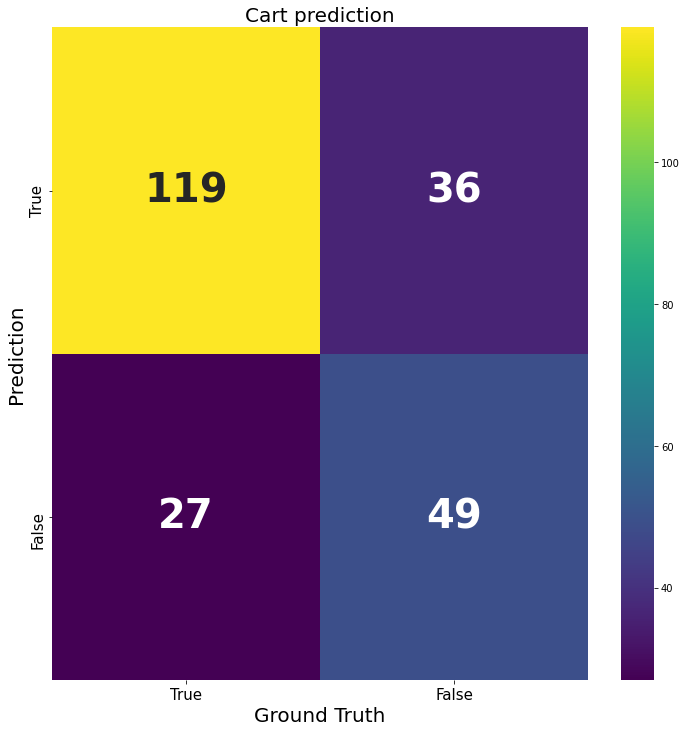

In [14]:
names_list =names[0:8] # 分类模型维度列表

_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test,predict1), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)
ax.set_title('ID3 prediction',fontsize=20)

#plot the confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test,predict2), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)
ax.set_title('Cart prediction',fontsize=20)

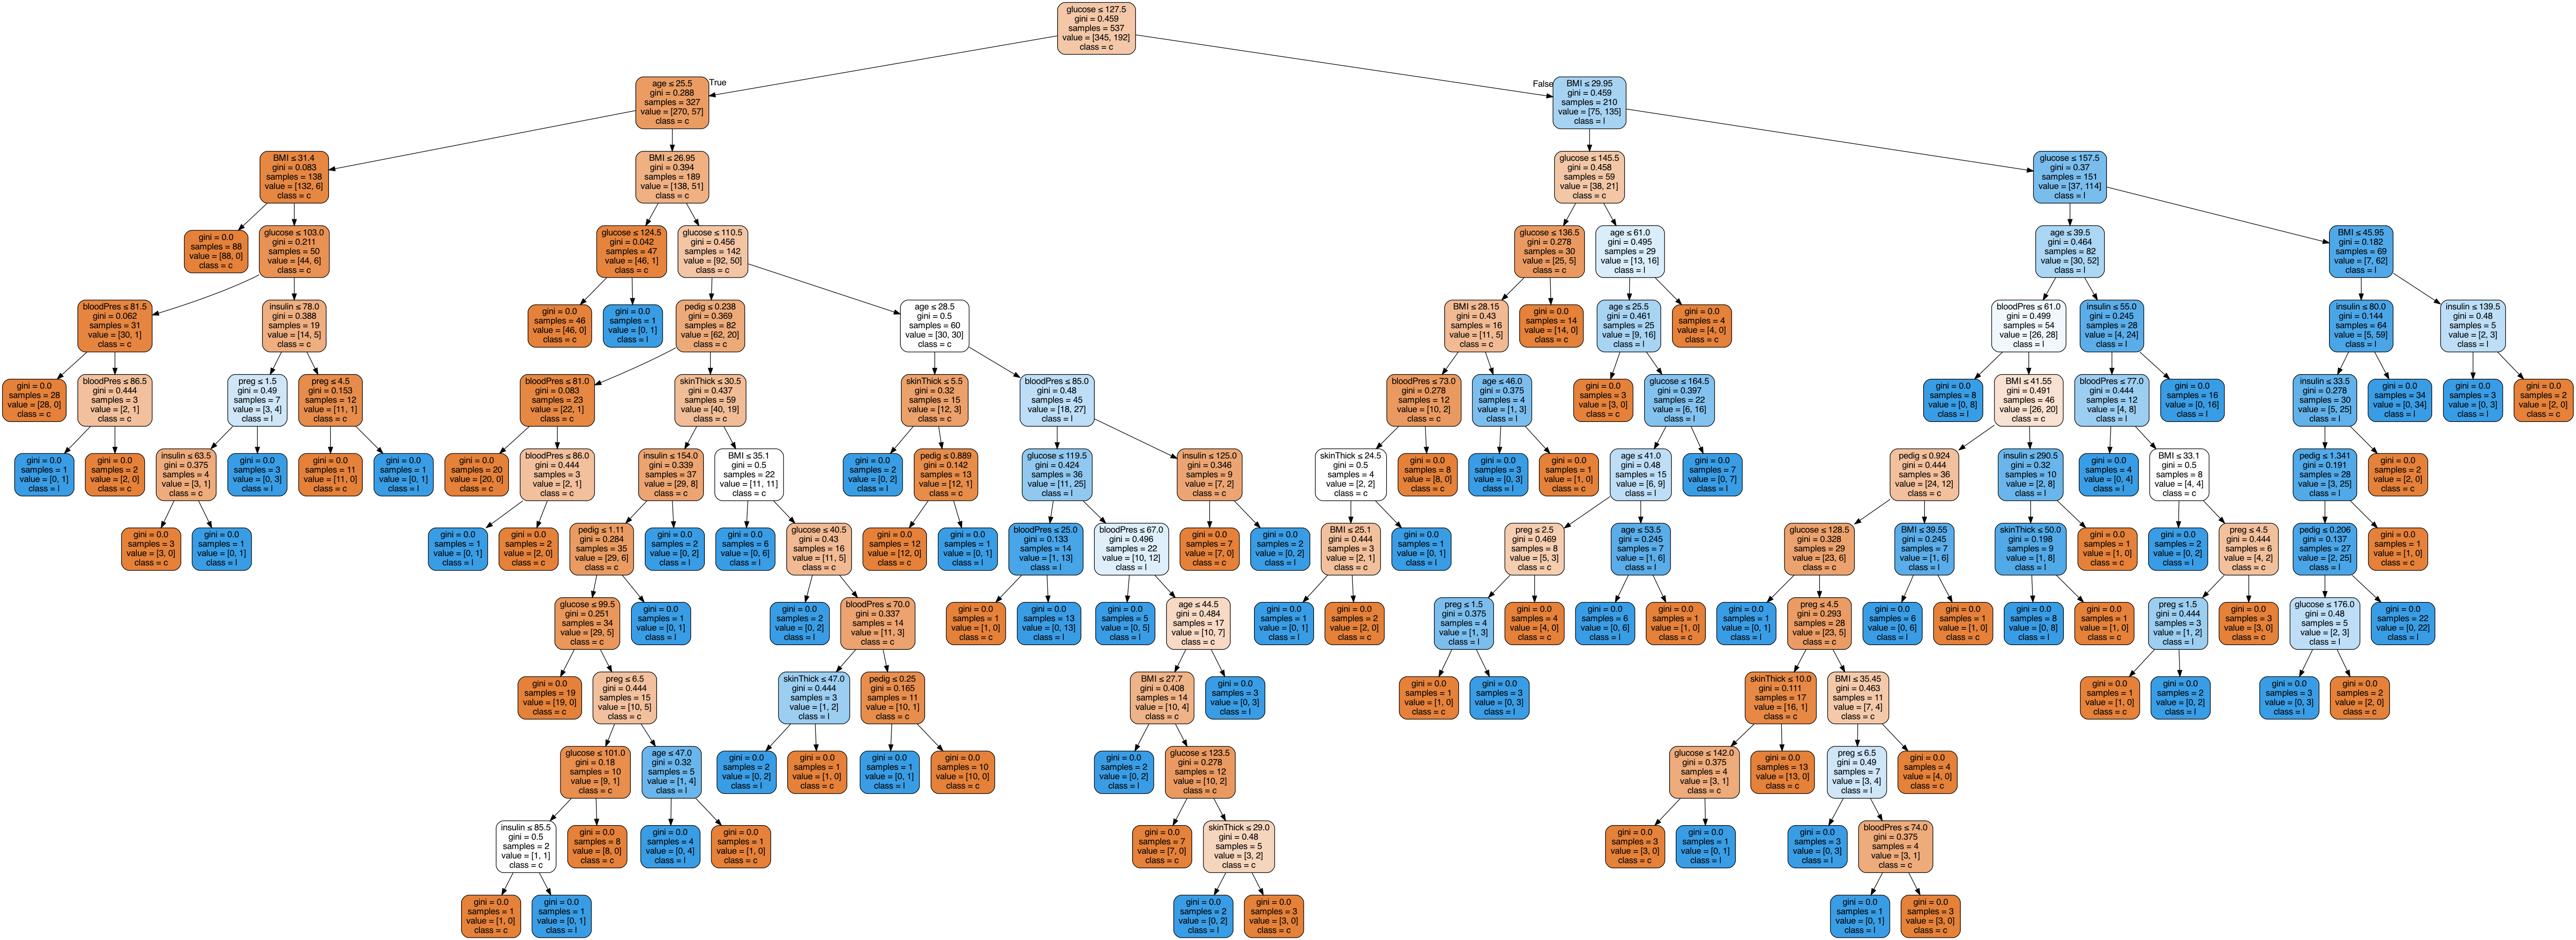

In [15]:
# graph = Source(tree.export_graphviz(clf, out_file=None))
# graph.format = 'png'
# graph.render('ID3-tree', view= True)
x_names = names[0:8]
y_names = names[8]
dot_data1 = tree.export_graphviz(id3, out_file=None, 
                         feature_names=x_names,  
                         class_names=y_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph1 = pydotplus.graph_from_dot_data(dot_data1)  
Image(graph1.create_png()) 
# Write graph to a png file
#graph1.write_png('id3.png')

dot_data2 = tree.export_graphviz(cart, out_file=None, 
                         feature_names=x_names,  
                         class_names=y_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data2)  
Image(graph2.create_png()) 
# Write graph to a png file
#graph2.write_png('cart.png')



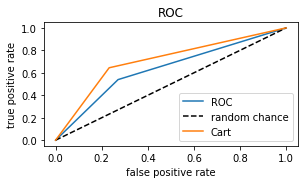

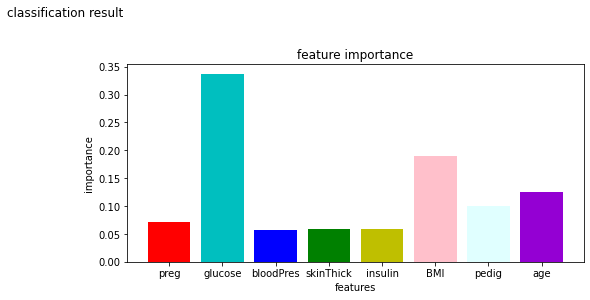

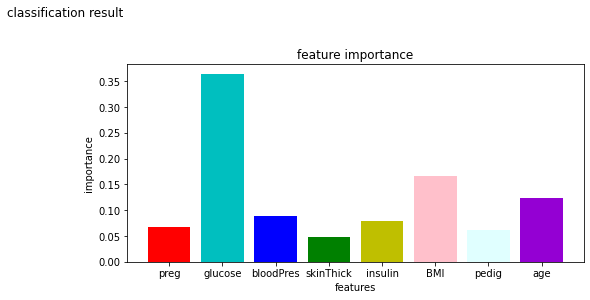

In [16]:
#准确率:某个类别在测试结果中被正确测试的比率
mean1=float('%.4f' % np.mean(predict1 == y_test))
# 召回率：某个类别在真实结果中被正确预测的比率
recall_str1=classification_report(y_test,predict1)
# 核心评估指标
y_score1 = id3.predict_proba(x_test)  # 获得决策树的预测
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1[:, 1])  # ROC

mean2=float('%.4f' % np.mean(predict2 == y_test))
# 召回率：某个类别在真实结果中被正确预测的比率
recall_str2=classification_report(y_test,predict2)
# 核心评估指标
y_score2 = cart.predict_proba(x_test)  # 获得决策树的预测
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2[:, 1])  # ROC

# 模型效果可视化 ROC

color_list = ['r', 'c', 'b', 'g','y','pink','lightcyan','darkviolet']  # 颜色列表
plt.figure(figsize=(10, 5))  # 创建画布
# 子网格1：ROC曲线
plt.subplot(2, 2, 1)  # 第一个子网格
plt.plot(fpr1, tpr1, label='ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  # 画出随机状态下的准确率线
plt.plot(fpr2, tpr2, label='Cart')  
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)

# 子网格2：指标重要性
feature_importance1 = id3.feature_importances_  # 获得指标重要性
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 2)  # 第二个子网格
plt.bar(np.arange(feature_importance1.shape[0]), feature_importance1, tick_label=names_list,
        color=color_list)  # 画出条形图
plt.title('feature importance')  # 子网格标题
plt.xlabel('features')  # x轴标题
plt.ylabel('importance')  # y轴标题
plt.suptitle('classification result')  # 图形总标题
plt.savefig("Eexample1.png")

# 子网格3：指标重要性
feature_importance2 = cart.feature_importances_  # 获得指标重要性
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 2)  # 第二个子网格
plt.bar(np.arange(feature_importance2.shape[0]), feature_importance2, tick_label=names_list,
        color=color_list)  # 画出条形图
plt.title('feature importance')  # 子网格标题
plt.xlabel('features')  # x轴标题
plt.ylabel('importance')  # y轴标题
plt.suptitle('classification result')  # 图形总标题
plt.savefig("Eexample2.png")




In [ ]:
# 随机森林

In [17]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None, criterion='entropy', random_state=0)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
rf_predict = rf_clf.predict(x_test)
print(pd.crosstab(y_test, rf_predict, rownames=['Actual class'], colnames=['predicted class']))


predicted class    0   1
Actual class            
0                130  25
1                 37  39


In [19]:
print(accuracy_score(y_test, rf_predict)) # 0.7445887445887446
print(recall_score(y_test, rf_predict)) # 0.6049382716049383
print(f1_score(y_test, rf_predict)) # 0.6242038216560509
print(roc_auc_score(y_test, rf_predict)) # 0.7124691358024692

0.7316017316017316
0.5131578947368421
0.5571428571428572
0.6759337860780985


In [20]:
print(classification_report(y_test, rf_predict, target_names = ['1','0']))

              precision    recall  f1-score   support

           1       0.78      0.84      0.81       155
           0       0.61      0.51      0.56        76

    accuracy                           0.73       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.73      0.73       231



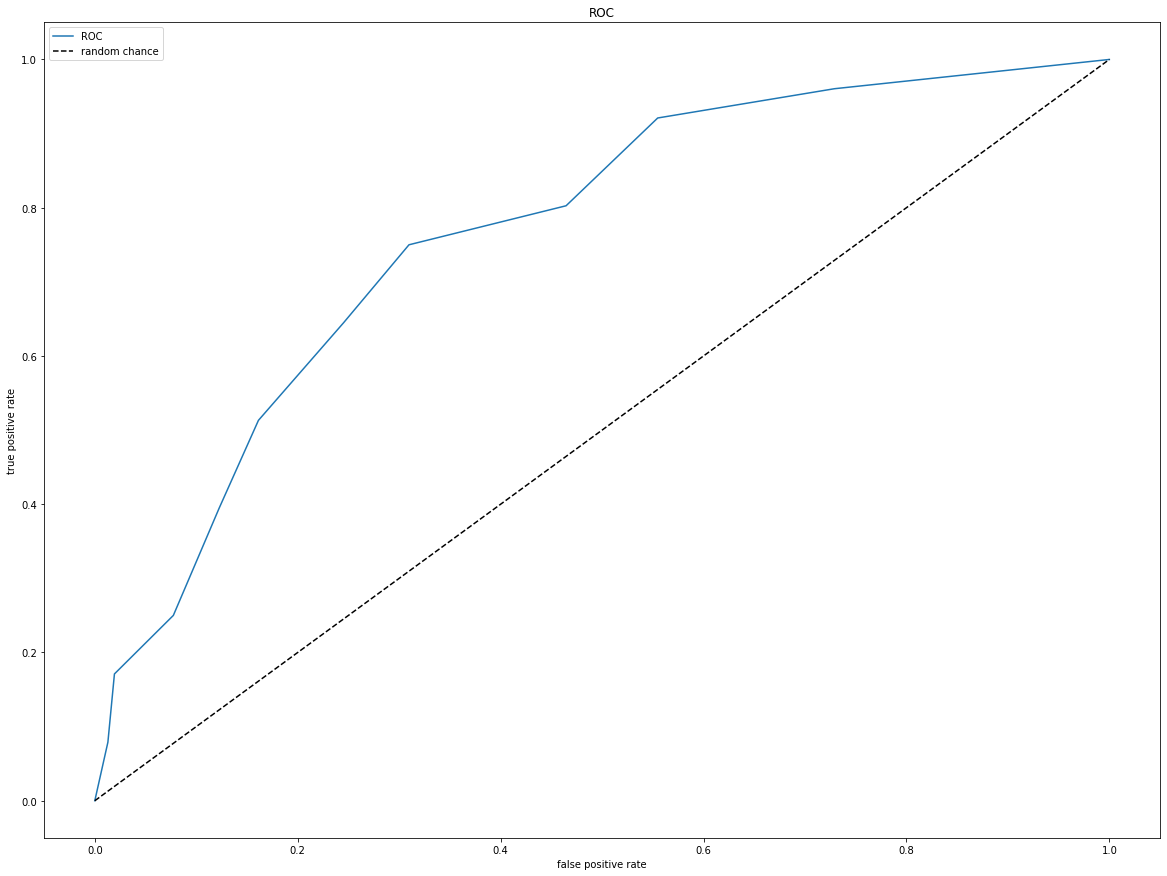

In [21]:
# roc
y_score3 = rf_clf.predict_proba(x_test)  # 获得决策树的预测
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3[:, 1])  # ROC

# 模型效果可视化 ROC

plt.figure(figsize=(20, 15))  # 创建画布

#plt.subplot(2, 2, 1)  # 第一个子网格
plt.plot(fpr3, tpr3, label='ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  # 画出随机状态下的准确率线
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)

Text(0.5, 0.98, 'classification result')

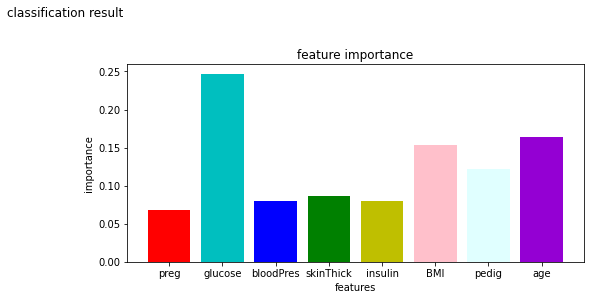

In [22]:
# 指标重要性图
feature_importance3 = rf_clf.feature_importances_  # 获得指标重要性
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 2)  # 第二个子网格
plt.bar(np.arange(feature_importance3.shape[0]), feature_importance3, tick_label=names_list,
        color=color_list)  # 画出条形图
plt.title('feature importance')  # 子网格标题
plt.xlabel('features')  # x轴标题
plt.ylabel('importance')  # y轴标题
plt.suptitle('classification result')  # 图形总标题

In [24]:
#首先对n_estimators进行网格搜索
from sklearn.model_selection import GridSearchCV
#from sklearn import grid_scores_, best_params_, best_score_
param_test1= {'n_estimators':range(10,101,10)}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                                          min_samples_leaf=20,max_depth=8,
                                                          max_features='sqrt' ,random_state=0),
                       param_grid =param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.cv_results_['mean_test_score'],gsearch1.best_params_, gsearch1.best_score_
# 可以看出n_estimators 为90时模型最好，最好的分数是0.8405132116802596


(array([0.80351953, 0.81854818, 0.82414285, 0.82522345, 0.82765554,
        0.83157699, 0.83280721, 0.83553169, 0.84051321, 0.83997536]),
 {'n_estimators': 90},
 0.8405132116802596)

In [25]:
# 最大深度
param_test2= {'max_depth':range(3,14,2),'min_samples_split':range(50,201,20),'min_samples_leaf':range(10,81,10)}
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 40,
                                                          max_features='sqrt',
                                                          oob_score=True,
                                                          random_state=0),
                       param_grid = param_test2,scoring='roc_auc', cv=5)
gsearch2.fit(x_test,y_test)
gsearch2.cv_results_['mean_test_score'],gsearch2.best_params_, gsearch2.best_score_
# max_depth 最好的是为3， min_samples_split最好的是90 ，min_samples_leaf最好的是20， 最好的分数是0.7568279569892473

(array([0.74586022, 0.74473118, 0.74446237, 0.73634409, 0.5       ,
        0.5       , 0.5       , 0.5       , 0.74672043, 0.7455914 ,
        0.75682796, 0.73860215, 0.5       , 0.5       , 0.5       ,
        0.5       , 0.74548387, 0.74607527, 0.73879032, 0.73370968,
        0.5       , 0.5       , 0.5       , 0.5       , 0.73701613,
        0.73701613, 0.73704301, 0.73327957, 0.5       , 0.5       ,
        0.5       , 0.5       , 0.73352151, 0.73352151, 0.73352151,
        0.73139785, 0.5       , 0.5       , 0.5       , 0.5       ,
        0.675     , 0.675     , 0.675     , 0.675     , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.75099462,
        0.74596774, 0.74446237, 0.73634409, 0.5       , 0.5       ,
        0.5       , 0.5       , 0.74543011, 0.74

                ID3      CART  RandomForest
accuracy   0.666667  0.727273      0.731602
mse        0.333333  0.272727      0.268398
precision  0.493976  0.576471      0.659091
recall     0.539474  0.644737      0.381579
f1_score   0.515723  0.608696      0.483333
auc        0.634253  0.706239      0.642402


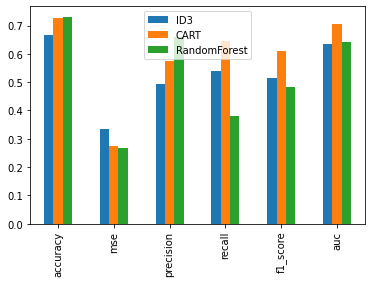

In [29]:
# 三个模型比较
rf_clf = RandomForestClassifier(n_estimators=90, max_depth=3, criterion='entropy', min_samples_split=90, min_samples_leaf=20,random_state=0)
rf_clf.fit(x_train, y_train)
rf_predict = rf_clf.predict(x_test)

# id3 , cart
model_accuracy = [accuracy_score(y_test,predict1),accuracy_score(y_test,predict2),accuracy_score(y_test,rf_predict)]
model_mse = [mean_squared_error(y_test,predict1),mean_squared_error(y_test,predict2),mean_squared_error(y_test,rf_predict)]
model_precision = [precision_score(y_test, predict1),precision_score(y_test, predict2),precision_score(y_test, rf_predict)]
model_recall = [recall_score(y_test, predict1),recall_score(y_test, predict2),recall_score(y_test, rf_predict)]  
model_f1_score  = [f1_score(y_test,predict1),f1_score(y_test,predict2),f1_score(y_test,rf_predict)]  
model_auc = [roc_auc_score(y_test,predict1),roc_auc_score(y_test,predict2),roc_auc_score(y_test,rf_predict)]

model_list_score = pd.DataFrame(
    data=[model_accuracy,model_mse,model_precision,model_recall,model_f1_score,model_auc],
    columns=['ID3','CART','RandomForest'],
    index=['accuracy','mse','precision','recall','f1_score','auc'])

print(model_list_score)
model_list_score.plot(kind='bar')
plt.show()


Text(0.5, 1.0, 'RandomForest prediction')

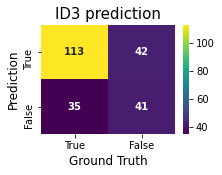

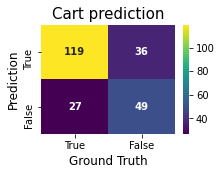

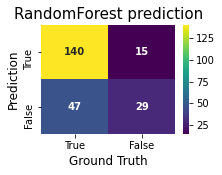

In [30]:
#plot the confusion matrix
_, ax = plt.subplots(figsize=(3,2))
ax = sns.heatmap(confusion_matrix(y_test,predict1), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 10, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Prediction', fontsize=12);
ax.set_xlabel('Ground Truth', fontsize=12)
ax.set_title('ID3 prediction',fontsize=15)
_, ax = plt.subplots(figsize=(3,2))
ax = sns.heatmap(confusion_matrix(y_test,predict2), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 10, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Prediction', fontsize=12);
ax.set_xlabel('Ground Truth', fontsize=12)
ax.set_title('Cart prediction',fontsize=15)
_, ax = plt.subplots(figsize=(3,2))
ax = sns.heatmap(confusion_matrix(y_test,rf_predict), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 10, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Prediction', fontsize=12);
ax.set_xlabel('Ground Truth', fontsize=12)
ax.set_title('RandomForest prediction',fontsize=15)

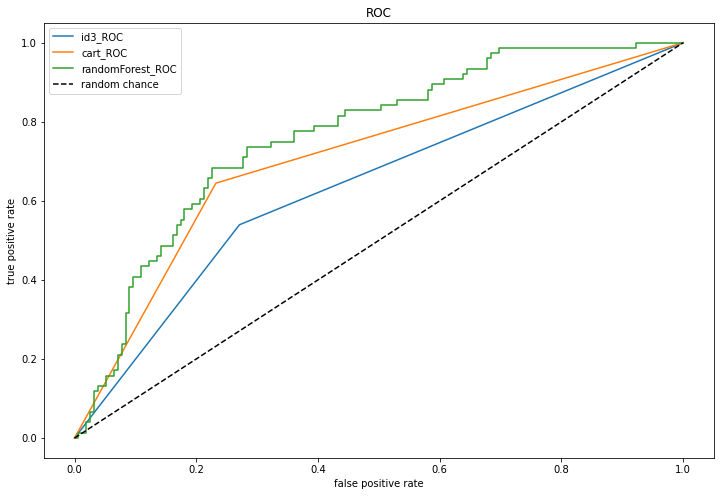

In [33]:
y_score4 = rf_clf.predict_proba(x_test)  # 获得决策树的预测
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_score4[:, 1])  # ROC
plt.figure(figsize=(12, 8))  # 创建画布

#plt.subplot(2, 2, 1)  # 第一个子网格
plt.plot(fpr1, tpr1, label='id3_ROC')  # 画出ROC曲线
plt.plot(fpr2, tpr2, label='cart_ROC')  # 画出ROC曲线
plt.plot(fpr4, tpr4, label='randomForest_ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  # 画出随机状态下的准确率线
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)